## Study session 10 - data analysis
### BIOINF 575 - Fall 2020
SOLUTION


____
Useful links to see the attributes (variables, properties) and methods (functions) a column of a pandas dataframe (Series) and a pandas dataframe has:    
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

____

### <font color = "red">Exercise</font>

[ClinVar][1] is a freely accessible, public archive of reports of the relationships among human variations and phenotypes, with supporting evidence.


The data you will be working with (`clinvar.vcf`).  More information about the database can be found [here][3].

From: https://ftp.ncbi.nlm.nih.gov/pub/clinvar/vcf_GRCh38/

Download the file clinvar.vcf.gz


### The file format
The beginning of every VCF file contains various sets of information:
* Meta-information (details about the experiment or configuration) lines start with **`##`**
    * These lines are helpful in understanding specialized keys found in the `INFO` column. It is in these sections that one can find:
        * The description of the key
        * The data type of the values
        * The default value of the values
* Header lines (column names) start with **`#`**

From there on, each line is made up of tab (`\t`) separated values that make up eight (8) columns. Those columns are:
1. CHROM (chromosome)
2. POS (base pair position of the variant)
3. ID (identifier if applicable; `.` if not applicable/missing)
4. REF (reference base)
5. ALT (alternate base(s): comma (`,`) separated if applicable)
6. QUAL (Phred-scaled quality score; `.` if not applicable/missing)
7. FILTER (filter status; `.` if not applicable/missing)
8. INFO (any additional information about the variant)
    * Semi-colon (`;`) separated key-value pairs
    * Key-value pairs are equal sign (`=`) separated (key on the left, value on the right)
    * If a key has multiple values, the values are pipe (`|`) separated

---
[1]: https://www.ncbi.nlm.nih.gov/clinvar/intro/
[2]: https://samtools.github.io/hts-specs/VCFv4.3.pdf
[3]: http://exac.broadinstitute.org


We also have a file with the gene expression for 45h every three hours for breast cancer cells treated with a HER2 inhibitor, `GSE22955_small_gene_table.txt`.
This is in the class_notebooks folder.
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE22955

### - Load the data from the 2 files in pandas dataframes

In [1]:
import numpy as np
import pandas as pd

In [2]:
vcf_file_name = "clinvar.vcf"
gse_file_path = "../class_notebooks/GSE22955_small_gene_table.txt"

In [3]:
# sep argument - set to "\t" because our data is tab-separated
# comment argument - set to "#" to ignore comment lines and other comments in our file
# header argument - set to None because our data does not have a header line, the header is in a comment line 

vcf_data = pd.read_csv(vcf_file_name, sep = "\t", comment = "#", header = None)


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
vcf_data.head()

,0,1,2,3,4,5,6,7
0,1,930188,846933,G,A,.,.,ALLELEID=824438;CLNDISDB=MedGen:CN517202;CLNDN...
1,1,930203,972363,C,T,.,.,ALLELEID=959431;CLNDISDB=MedGen:CN517202;CLNDN...
2,1,930248,789256,G,A,.,.,AF_ESP=0.00347;AF_EXAC=0.00622;AF_TGP=0.00280;...
3,1,930275,969662,T,G,.,.,ALLELEID=959432;CLNDISDB=MedGen:CN517202;CLNDN...
4,1,930336,843786,G,A,.,.,ALLELEID=824439;CLNDISDB=MedGen:CN517202;CLNDN...


In [5]:
vcf_data.columns = ("CHROM", "POS", "ID", "REF", "ALT", "QUAL", "FILTER", "INFO")
vcf_data.iloc[:5,:5]



,CHROM,POS,ID,REF,ALT
0,1,930188,846933,G,A
1,1,930203,972363,C,T
2,1,930248,789256,G,A
3,1,930275,969662,T,G
4,1,930336,843786,G,A


In [6]:
expression_data = pd.read_csv(gse_file_path, sep = "\t", index_col = 0, comment = "#")

In [7]:
expression_data.head()


,0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45
Symbol,,,,,,,,,,,,,,,,
ABCA1,7.497117,8.184737,8.384009,8.654385,8.705771,9.266485,9.097249,8.980061,8.911098,9.377178,9.142381,9.314741,9.622010,9.543455,9.559486,10.094392
ABCC11,9.681143,9.687135,9.498255,9.357438,9.189169,9.049327,8.976153,8.978854,8.967797,8.912375,8.851690,8.787110,8.679719,8.771382,8.633315,8.703377
ABCC3,12.834826,12.841947,12.924113,12.810950,12.990568,12.791429,12.410250,12.343846,11.682339,11.369507,11.188391,11.105528,11.343285,11.151681,11.214401,10.928790
ABLIM1,10.786000,10.912505,11.060394,11.091041,11.166662,11.293522,11.355008,11.331177,11.649917,11.622126,11.733842,11.772563,11.909730,11.724674,11.835192,11.720621
ABP1,7.943247,8.121638,8.293621,8.314716,8.345499,8.414776,8.368459,8.539609,8.649921,8.698824,8.688555,8.762338,9.098345,9.294049,9.323449,9.729671


In [8]:
expression_data.columns = "hour"+expression_data.columns

In [9]:
expression_data.iloc[:5,:5]



,hour0,hour3,hour6,hour9,hour12
Symbol,,,,,
ABCA1,7.497117,8.184737,8.384009,8.654385,8.705771
ABCC11,9.681143,9.687135,9.498255,9.357438,9.189169
ABCC3,12.834826,12.841947,12.924113,12.810950,12.990568
ABLIM1,10.786000,10.912505,11.060394,11.091041,11.166662
ABP1,7.943247,8.121638,8.293621,8.314716,8.345499


______

#### - Select only 5 genes of interest TP53, BARD1, BRCA1, MAPK1, CHEK2

In [10]:
expression_data.index[1050:1150]

Index(['TFDP1', 'TFF3', 'TGFB3', 'THBS1', 'THBS3', 'THOC4', 'THOP1',
       'TIMELESS', 'TIMM8B', 'TJP3', 'TK1', 'TLR5', 'TMC4', 'TMEM106B',
       'TMEM106C', 'TMEM115', 'TMEM118', 'TMEM125', 'TMEM127', 'TMEM20',
       'TMEM44', 'TMEM45A', 'TMEM48', 'TMEM97', 'TMEM98', 'TMPO', 'TMPRSS2',
       'TMSL8', 'TNFRSF18', 'TNFSF10', 'TOM1', 'TOMM40', 'TOP2A', 'TOPBP1',
       'TP53', 'TP53INP1', 'TP53TG3', 'TPARL', 'TPX2', 'TRA16', 'TRADD',
       'TRAF3', 'TRAP1', 'TRIM2', 'TRIM21', 'TRIM22', 'TRIP13', 'TROAP',
       'TRPM4', 'TRPV6', 'TSC22D1', 'TTC32', 'TTF2', 'TTK', 'TTLL12', 'TTYH1',
       'TUBA1', 'TUBA1A', 'TUBA6', 'TUBB', 'TUBB2C', 'TUBB3', 'TUBB4Q',
       'TUBB6', 'TUBG1', 'TUFT1', 'TXNDC13', 'TYMS', 'TYRO3', 'U2AF1L4',
       'UBE2C', 'UBE2T', 'UBQLN2', 'UCHL5IP', 'UCK2', 'UGT2B11', 'UGT2B7',
       'UNC84B', 'UNG', 'UPP1', 'USP37', 'VAMP5', 'VARS', 'VAV3', 'VGF',
       'VKORC1L1', 'VPS39', 'VRK1', 'VSIG2', 'VSIG8', 'VTCN1', 'VWF', 'WDR12',
       'WDR19', 'WDR34', 'WDR4', 'WD

In [11]:
genes = ("TP53", "BARD1", "BRCA1", "MAPK1", "CHEK2")
genes_data = expression_data.loc[genes,].T

#### - Plot the expression of these genes 

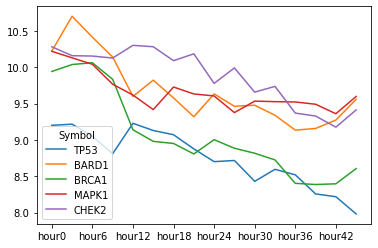

In [12]:
genes_data.plot()

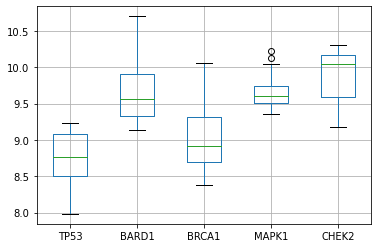

In [13]:
genes_data.boxplot()

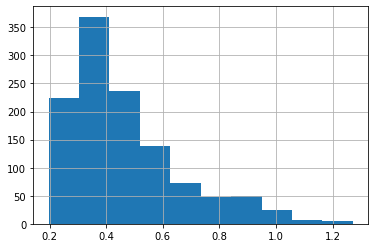

In [14]:
expression_data.apply(np.std, axis = 1).hist()

______

#### - Select only genes that have a standard dev > 0.7 and a change between hour 0 and hour 45 > 1.4 fold.


In [15]:
cond = (expression_data.apply(np.std, axis = 1) > 0.6) & \
(np.log2(expression_data.hour45/expression_data.hour0).abs()>np.log2(1.4))      
    

In [16]:
consistent_genes = expression_data[cond]

#### - Plot the expression of these genes

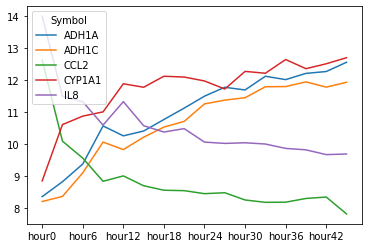

In [17]:
consistent_genes.T.plot()

#### - From the VCF file identify the genes for each variant from the info column GENEINFO key


In [18]:
def get_genes(info):
    genes = set()
    info_dict = {}
    info_list = info.split(";")
    for elem in info_list:
        key, val = elem.split("=")
        info_dict[key] = val
    if "GENEINFO" in info_dict:
        for gene_elem in info_dict["GENEINFO"].split("|"):
            genes.add(gene_elem.split(":")[0])
    return genes

In [19]:
genes_data = vcf_data.INFO.apply(get_genes)

In [20]:


cond1 = genes_data.apply(lambda x: len(x.intersection(set(genes)))>0)

#### - Select only the variants for our genes of interest:

In [21]:
genes_data.name = "GENES"
vcf_data = vcf_data.join(genes_data)

In [22]:
vcf_data[cond1]

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,GENES
129497,2,214727991,951555,ATGTACAGAATAAAAATATGTACCATGAGCCTAGTGTTGATTTTTA...,A,.,.,"ALLELEID=922543;CLNDISDB=MONDO:MONDO:0016419,M...",{BARD1}
129498,2,214728537,801873,C,CTT,.,.,"ALLELEID=790174;CLNDISDB=MONDO:MONDO:0016419,M...",{BARD1}
129499,2,214728537,801874,C,CTTT,.,.,"ALLELEID=790175;CLNDISDB=MONDO:MONDO:0016419,M...",{BARD1}
129500,2,214728537,369328,C,CTTTT,.,.,ALLELEID=353557;CLNDISDB=Human_Phenotype_Ontol...,{BARD1}
129501,2,214728537,801875,CT,C,.,.,"ALLELEID=790173;CLNDISDB=MONDO:MONDO:0016419,M...",{BARD1}
...,...,...,...,...,...,...,...,...,...
734163,22,28741802,381607,C,G,.,.,ALLELEID=379845;CLNDISDB=MedGen:CN169374;CLNDN...,{CHEK2}
734164,22,28741806,341057,C,G,.,.,ALLELEID=352332;CLNDISDB=MedGen:CN239278;CLNDN...,{CHEK2}
734165,22,28741832,803661,T,A,.,.,"ALLELEID=792036;CLNDISDB=MONDO:MONDO:0016419,M...",{CHEK2}
734166,22,28741876,126906,T,C,.,.,ALLELEID=132419;CLNDISDB=MedGen:CN517202;CLNDN...,{CHEK2}
